In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# TITLE
'''Students benefiting from the university canteen - 2023 [UNHEVAL]
'''



# DATA DESCRIPTION
'''It contains the information of the students who benefit from the university canteen of the Hermilio Valdizán National University.

The beneficiary students belong to the central headquarters that is located in Huánuco.'''

In [3]:
Students_benefit_canteen_all=pd.read_csv('/content/drive/MyDrive/beneficiarios_comedor_2023_unheval.csv', encoding=('ISO-8859-1'))


# DATA CLEANING

In [4]:
Students_benefit_canteen_all.DEPARTAMENTO.value_counts()

HUANUCO        1013
PASCO            65
LIMA             55
SAN MARTIN       28
JUNIN            24
UCAYALI          20
ANCASH            4
AYACUCHO          2
LA LIBERTAD       2
LORETO            2
PUNO              2
CALLAO            2
AREQUIPA          1
CUSCO             1
ICA               1
PIURA             1
Name: DEPARTAMENTO, dtype: int64

In [5]:
Students_benefit_canteen=Students_benefit_canteen_all[Students_benefit_canteen_all['DEPARTAMENTO']=='LIMA']
Students_benefit_canteen.head()

,FECHA_CORTE,UUID,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_NACIMIENTO,EDAD,FACULTAD,ESCUELA_ACADEMICA,NIVEL_ACAD,ANIO_MAT1,SEM_MATRICULA1,N_RAC_DESAYUNO,N_RAC_ALMUERZO,N_RAC_CENA
1048,20230620,2D8FCE86125541D59F3043AB4C53489A,150101,LIMA,LIMA,LIMA,MASCULINO,20010910,21,CIENCIAS AGRARIAS,INGENIERÍA AGRONÓMICA,PREGRADO,2020,1,36,37,30
1049,20230620,8AFDC7FAFDC147889B9E7A9B1D492A3C,150101,LIMA,LIMA,LIMA,FEMENINO,19950423,28,MEDICINA,MEDICINA HUMANA,PREGRADO,2015,1,13,15,13
1050,20230620,00E9CF80DF724D92B5199EF87B72777B,150101,LIMA,LIMA,LIMA,FEMENINO,20040517,19,CIENCIAS ADMINISTRATIVAS Y TURISMO,TURISMO Y HOTELERÍA,PREGRADO,2023,1,36,37,30
1051,20230620,CF0B6AB4F83744B79A2F399595AD04FC,150101,LIMA,LIMA,LIMA,MASCULINO,19960413,27,CIENCIAS CONTABLES Y FINANCIERAS,CIENCIAS CONTABLES Y FINANCIERAS,PREGRADO,2019,1,19,31,30
1052,20230620,F950D455B3CA42DD85621A4A8F80845B,150101,LIMA,LIMA,LIMA,FEMENINO,19981010,24,CIENCIAS CONTABLES Y FINANCIERAS,CIENCIAS CONTABLES Y FINANCIERAS,PREGRADO,2020,1,29,37,29


In [6]:
Students_benefit_canteen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1048 to 1102
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FECHA_CORTE        55 non-null     int64 
 1   UUID               55 non-null     object
 2   UBIGEO             55 non-null     int64 
 3   DEPARTAMENTO       55 non-null     object
 4   PROVINCIA          55 non-null     object
 5   DISTRITO           55 non-null     object
 6   SEXO               55 non-null     object
 7   FECHA_NACIMIENTO   55 non-null     int64 
 8   EDAD               55 non-null     int64 
 9   FACULTAD           55 non-null     object
 10  ESCUELA_ACADEMICA  55 non-null     object
 11  NIVEL_ACAD         55 non-null     object
 12  ANIO_MAT1          55 non-null     int64 
 13  SEM_MATRICULA1     55 non-null     int64 
 14  N_RAC_DESAYUNO     55 non-null     int64 
 15  N_RAC_ALMUERZO     55 non-null     int64 
 16  N_RAC_CENA         55 non-null     int64 

In [7]:
Students_benefit_canteen.isna().sum()

FECHA_CORTE          0
UUID                 0
UBIGEO               0
DEPARTAMENTO         0
PROVINCIA            0
DISTRITO             0
SEXO                 0
FECHA_NACIMIENTO     0
EDAD                 0
FACULTAD             0
ESCUELA_ACADEMICA    0
NIVEL_ACAD           0
ANIO_MAT1            0
SEM_MATRICULA1       0
N_RAC_DESAYUNO       0
N_RAC_ALMUERZO       0
N_RAC_CENA           0
dtype: int64

In [8]:
Students_benefit_canteen.columns

Index(['FECHA_CORTE', 'UUID', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'SEXO', 'FECHA_NACIMIENTO', 'EDAD', 'FACULTAD',
       'ESCUELA_ACADEMICA', 'NIVEL_ACAD', 'ANIO_MAT1', 'SEM_MATRICULA1',
       'N_RAC_DESAYUNO', 'N_RAC_ALMUERZO', 'N_RAC_CENA'],
      dtype='object')

In [9]:
Students_benefit_canteen.isnull().sum().sum()

0

In [10]:
Students_benefit_canteen.duplicated().sum()

0

In [11]:
Students_benefit_canteen['ESCUELA_ACADEMICA'] = Students_benefit_canteen['ESCUELA_ACADEMICA'].replace({
    'INGENIERÍA INDUSTRIAL':'ING_IND','CIENCIAS CONTABLES Y FINANCIERAS':'C&F','CIENCIAS ADMINISTRATIVAS':'ADMIN',                                                                                     'CIENCIAS DE LA EDUCACIÓN':'EDUCACIÓN',
    'LENGUA Y LITERATURA':'LENGUE','INGENIERÍA DE SISTEMAS':'ING_SIS','INGENIERÍA AGRONÓMICA':'AGRONÓMICA',
    'EDUCACIÓN PRIMARIA':'PRIMARIA_EDU','EDUCACIÓN FÍSICA':'FÍSICA_EDU','EDUCACIÓN FÍSICA':'FÍSICA_EDU',
    'MEDICINA VETERINARIA':'VET_MED','DERECHO Y CIENCIAS POLÍTICAS':'POLÍTICAS','TURISMO Y HOTELERÍA':'TURISMO',
    'CIENCIAS DE LA COMUNICACIÓN SOCIAL':'COMUNICACIÓN'})


<ipython-input-11-ff62a08a3a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_benefit_canteen['ESCUELA_ACADEMICA'] = Students_benefit_canteen['ESCUELA_ACADEMICA'].replace({


In [12]:
Students_benefit_canteen['FACULTAD'] = Students_benefit_canteen['FACULTAD'].replace({
    'CIENCIAS ADMINISTRATIVAS Y TURISMO':'TURISMO','CIENCIAS AGRARIAS':'AGRARIAS','CIENCIAS CONTABLES Y FINANCIERAS':'C&F',
    'CIENCIAS DE LA EDUCACIÓN':'EDUCACIÓN','CIENCIAS SOCIALES':'SOCIALES','DERECHO Y CIENCIAS POLÍTICAS':'POLÍTICAS',
    'INGENIERÍA CIVIL Y ARQUITECTURA':'CIVIL_ING&ARQ','INGENIERÍA INDUSTRIAL Y DE SISTEMAS':'ING_IND&SYS',
    'MEDICINA VETERINARIA Y ZOOTECNIA':'VET_MED'})

<ipython-input-12-9f6693fbdaff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_benefit_canteen['FACULTAD'] = Students_benefit_canteen['FACULTAD'].replace({


# DATA VISUALISATION

Age Statistics:
count    55.000000
mean     21.963636
std       2.707764
min      17.000000
25%      20.000000
50%      22.000000
75%      23.000000
max      29.000000
Name: EDAD, dtype: float64


<ipython-input-13-cd197e677240>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_benefit_canteen['FECHA_NACIMIENTO'] = pd.to_datetime(Students_benefit_canteen['FECHA_NACIMIENTO'], format='%Y%m%d', errors='coerce')
<ipython-input-13-cd197e677240>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_benefit_canteen['EDAD'] = ((pd.to_datetime('today') - Students_benefit_canteen['FECHA_NACIMIENTO']).dt.days / 365.25).round().astype(int)


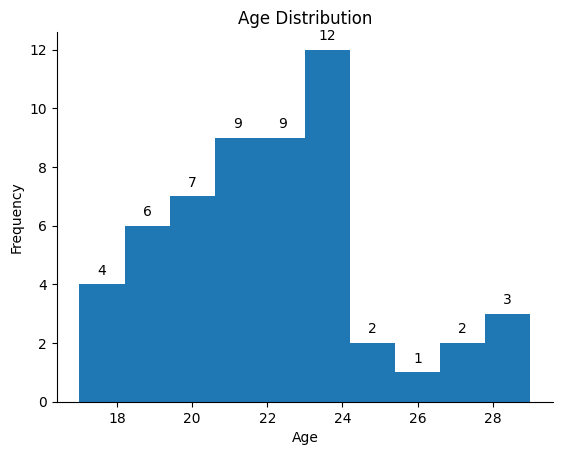

In [13]:
Students_benefit_canteen['FECHA_NACIMIENTO'] = pd.to_datetime(Students_benefit_canteen['FECHA_NACIMIENTO'], format='%Y%m%d', errors='coerce')

# Calculate Age

Students_benefit_canteen['EDAD'] = ((pd.to_datetime('today') - Students_benefit_canteen['FECHA_NACIMIENTO']).dt.days / 365.25).round().astype(int)

# Display basic statistics of the Age column
print("Age Statistics:")
print(Students_benefit_canteen['EDAD'].describe())

# Plot a histogram of ages
ax=Students_benefit_canteen['EDAD'].plot(kind='hist', bins=10, title='Age Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Age')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

'''The age distribution of students benefiting from the university canteen in 2023 reveals interesting insights. The majority of students fall within the age range of 21 to 23, with 21 being the most prevalent age, followed closely by 22 and 23. This suggests that the canteen services are particularly popular among students in their early twenties. The distribution gradually decreases for older age groups, with a noticeable decline after the age of 24. It's essential to consider these age dynamics when tailoring and optimizing the canteen services to meet the preferences and needs of the university's student population.'''

Average Age by school Academic:
ESCUELA_ACADEMICA
ADMIN                21.000000
AGRONÓMICA           21.666667
ARQUITECTURA         21.000000
C&F                  22.571429
COMUNICACIÓN         20.000000
ECONOMÍA             21.000000
EDUCACIÓN INICIAL    24.000000
FÍSICA_EDU           22.500000
ING_IND              22.000000
ING_SIS              22.000000
LENGUE               20.250000
MEDICINA HUMANA      29.000000
OBSTETRICIA          24.000000
ODONTOLOGÍA          22.250000
POLÍTICAS            22.000000
PRIMARIA_EDU         25.666667
PSICOLOGÍA           20.666667
SOCIOLOGÍA           17.000000
TURISMO              19.000000
VET_MED              21.500000
Name: EDAD, dtype: float64


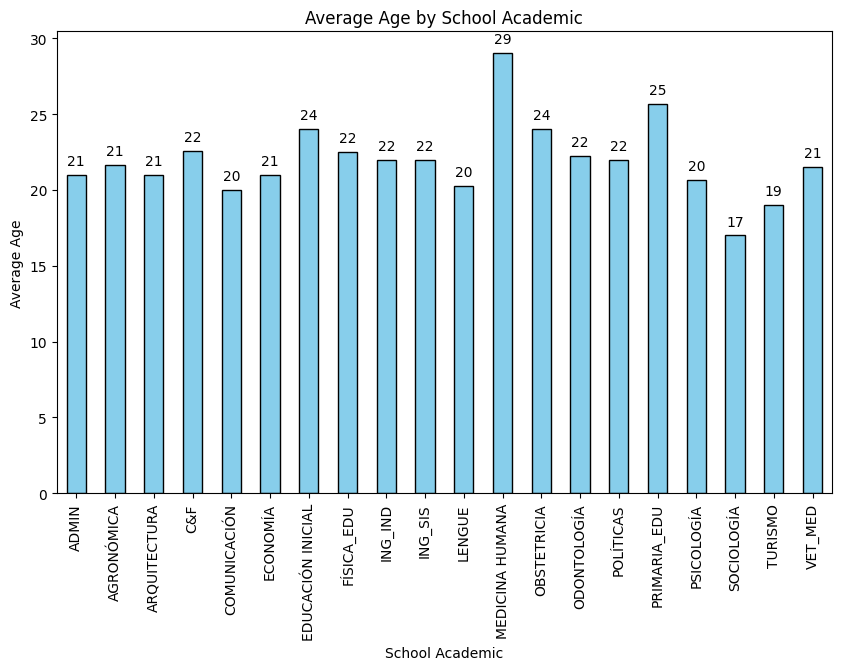

In [14]:

# Group by academic level and calculate the mean age for each group
age_by_school_academic = Students_benefit_canteen.groupby('ESCUELA_ACADEMICA')['EDAD'].mean()

# Display the result
print("Average Age by school Academic:")
print(age_by_school_academic)

# Plot average age by academic level
plt.figure(figsize=(10, 6))
ax=age_by_school_academic.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Age by School Academic')
plt.xlabel('School Academic')
plt.ylabel('Average Age')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

'''The bar chart depicting the average age by school academic provides valuable insights into the age distribution across different academic disciplines. It is evident that there is variation in the average age of students benefiting from the university canteen among different schools.

The school of Medicine (MEDICINA HUMANA) has the highest average age, with students having an average age of 29. This might be attributed to the longer duration of study and training required in medical programs. On the other hand, the schools of SOCIOLOGÍA and COMUNICACIÓN have notably lower average ages, indicating a younger student population.

Understanding these variations in average age is crucial for the university's canteen management to tailor services and offerings to the preferences and needs of students in each academic discipline. It highlights the importance of recognizing the diverse demographic characteristics of the student body when planning and optimizing services within specific academic contexts.'''

In [15]:
# Create a new column 'Student_ID' based on 'UUID'
Students_benefit_canteen['Student_ID'] = 's' + Students_benefit_canteen['UUID'].astype('category').cat.codes.astype(str)

# Display the DataFrame with the new 'Student_ID' column
#print(Students_benefit_canteen[['UUID', 'Student_ID']])

<ipython-input-15-299113749752>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_benefit_canteen['Student_ID'] = 's' + Students_benefit_canteen['UUID'].astype('category').cat.codes.astype(str)


In [16]:


# Columns representing the number of meals for each category
meal_columns = ['N_RAC_DESAYUNO', 'N_RAC_ALMUERZO', 'N_RAC_CENA']

# Calculate the total number of meals for each student
Students_benefit_canteen['TOTAL_MEALS'] = Students_benefit_canteen[meal_columns].sum(axis=1)

# Find the student with the highest and lowest total number of meals
student_with_highest_meals = Students_benefit_canteen.loc[Students_benefit_canteen['TOTAL_MEALS'].idxmax()]
student_with_lowest_meals = Students_benefit_canteen.loc[Students_benefit_canteen['TOTAL_MEALS'].idxmin()]

# Display the results
print("Student with the Highest Number of Meals:")
print(student_with_highest_meals[['Student_ID', 'TOTAL_MEALS']])
print("\nStudent with the Lowest Number of Meals:")
print(student_with_lowest_meals[['Student_ID', 'TOTAL_MEALS']])

Student with the Highest Number of Meals:
Student_ID     s30
TOTAL_MEALS    106
Name: 1092, dtype: object

Student with the Lowest Number of Meals:
Student_ID     s36
TOTAL_MEALS     40
Name: 1056, dtype: object


<ipython-input-16-a1807ebe63ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_benefit_canteen['TOTAL_MEALS'] = Students_benefit_canteen[meal_columns].sum(axis=1)


<ipython-input-17-88729c812598>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='ANIO_MAT1', y='TOTAL_MEALS',marker='s', data=total_meals_per_year, palette='viridis')


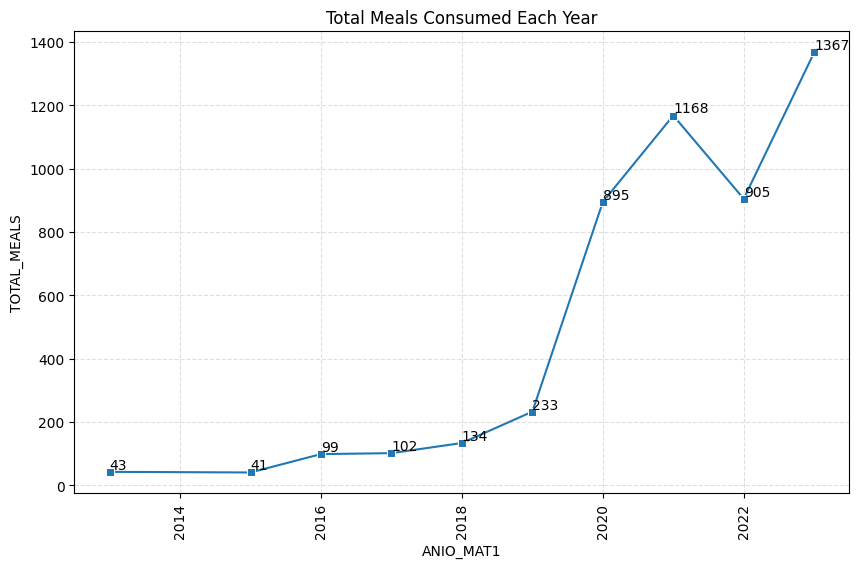

In [17]:
total_meals_per_year = Students_benefit_canteen.groupby('ANIO_MAT1')['TOTAL_MEALS'].sum().reset_index()
plt.figure(figsize=(10, 6))

sns.lineplot(x='ANIO_MAT1', y='TOTAL_MEALS',marker='s', data=total_meals_per_year, palette='viridis')
plt.title('Total Meals Consumed Each Year')
for index, row in total_meals_per_year.iterrows():
    plt.text(row['ANIO_MAT1'], row['TOTAL_MEALS'], str(row['TOTAL_MEALS']), ha='left', va='bottom')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()





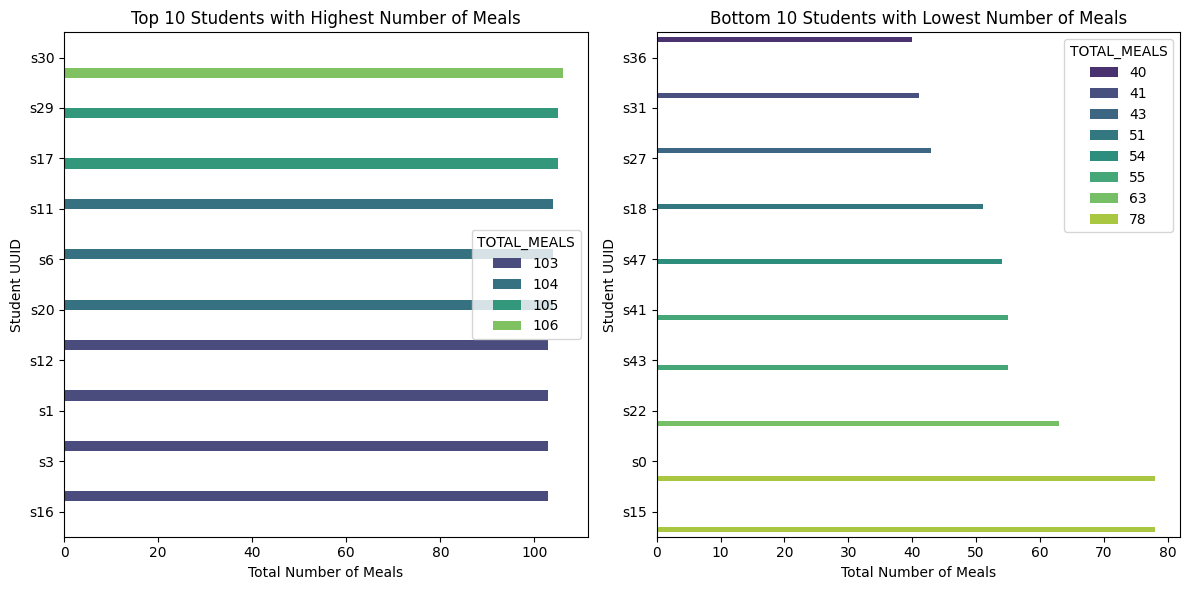

In [18]:
# Find the top 10 students with the highest number of meals
top_10_highest_meals = Students_benefit_canteen.nlargest(10, 'TOTAL_MEALS')

# Find the bottom 10 students with the lowest number of meals
bottom_10_lowest_meals = Students_benefit_canteen.nsmallest(10, 'TOTAL_MEALS')

# Plotting
plt.figure(figsize=(12, 6))

# Top 10 Students with Highest Number of Meals
plt.subplot(1, 2, 1)
sns.barplot(x='TOTAL_MEALS', y='Student_ID', data=top_10_highest_meals, palette='viridis',hue='TOTAL_MEALS')
plt.title('Top 10 Students with Highest Number of Meals')
plt.xlabel('Total Number of Meals')
plt.ylabel('Student UUID')


# Bottom 10 Students with Lowest Number of Meals
plt.subplot(1, 2, 2)
sns.barplot(x='TOTAL_MEALS', y='Student_ID', data=bottom_10_lowest_meals, palette='viridis',hue='TOTAL_MEALS')
plt.title('Bottom 10 Students with Lowest Number of Meals')
plt.xlabel('Total Number of Meals')
plt.ylabel('Student UUID')

plt.tight_layout()
plt.show()

Top 10 Students with the Highest Meals:
The bar plot for the top 10 students with the highest meals showcases individuals who consistently availed themselves of the university canteen services. These students, perhaps due to specific dietary preferences, busy schedules, or other factors, stand out in terms of their meal consumption. This visualization provides valuable insights into the extreme end of the distribution, emphasizing the diversity in students' dining habits.

Bottom 10 Students with the Lowest Meals:
Conversely, the bar plot for the bottom 10 students with the lowest meals sheds light on those who utilized the canteen services less frequently. Understanding the reasons behind this lower level of engagement—whether it be external dietary choices, alternative dining options, or other factors—can be crucial for the canteen management. It helps in tailoring services to different segments of the student population and addressing the diverse needs and preferences that contribute to varying levels of meal consumption.

In summary, these subplots provide a nuanced view of the meal consumption patterns among students, offering insights into both the higher and lower ends of the spectrum. This information can guide canteen management in optimizing services and creating a more inclusive dining experience for all students.

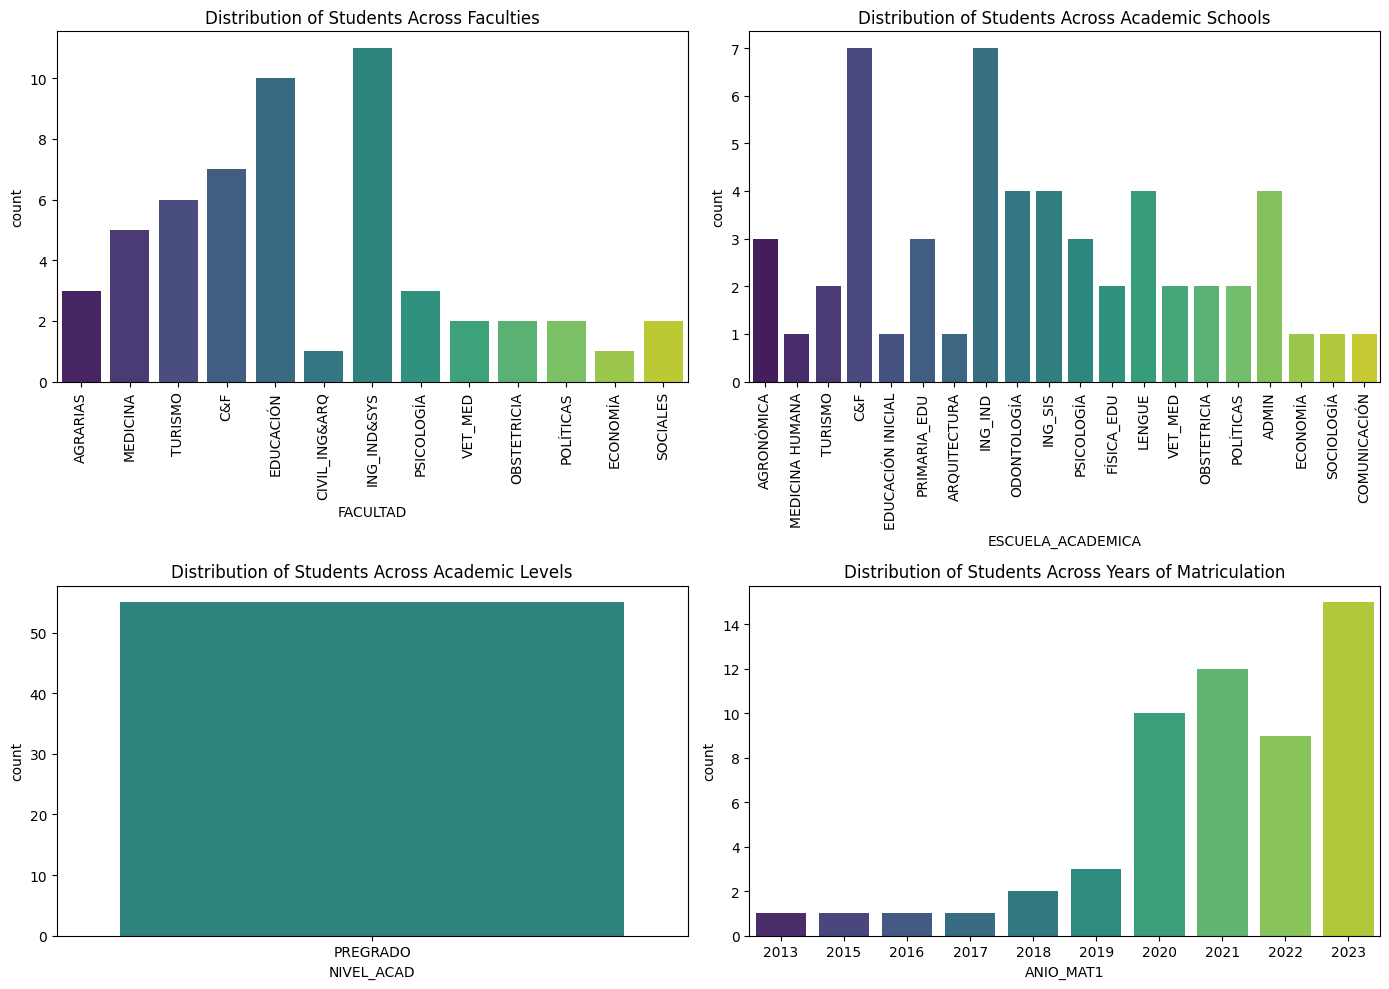

In [19]:
# Examine the distribution of students across faculties, academic schools, academic levels, and years of matriculation
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='FACULTAD', data=Students_benefit_canteen, palette='viridis')
plt.title('Distribution of Students Across Faculties')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.countplot(x='ESCUELA_ACADEMICA', data=Students_benefit_canteen, palette='viridis')
plt.title('Distribution of Students Across Academic Schools')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.countplot(x='NIVEL_ACAD', data=Students_benefit_canteen, palette='viridis')
plt.title('Distribution of Students Across Academic Levels')

plt.subplot(2, 2, 4)
sns.countplot(x='ANIO_MAT1', data=Students_benefit_canteen, palette='viridis')
plt.title('Distribution of Students Across Years of Matriculation')


plt.tight_layout()
plt.show()

Academic Discipline (ESCUELA_ACADEMICA):
The most common academic disciplines among students benefiting from the university canteen are INDUSTRIAL ENGINEERING and ACCOUNTING AND FINANCIAL SCIENCES, each with 7 students.
Other disciplines such as ADMINISTRATIVE SCIENCES,
LANGUAGE AND LITERATURE, and SYSTEMS ENGINEER also have a notable representation.

Faculty (FACULTAD):
The majority of students belong to the faculties of INDUSTRIAL AND SYSTEMS ENGINEERING, EDUCATIONAL SCIENCES, and ACCOUNTING AND FINANCIAL SCIENCES, with 11, 10, and 7 students, respectively.
ADMINISTRATIVE SCIENCES AND TOURISM, MEDICINA, and AGRICULTURAL SCIENCES also contribute to the student population.

Academic Level (NIVEL_ACAD):
All students in the dataset are at the undergraduate level (PREGRADO), totaling 55.

Year of Enrollment (ANIO_MAT1):
The year 2023 has the highest enrollment, with 15 students, followed by 2021 with 12 students.

The dataset includes students from various years, indicating a diverse representation across different cohorts.
This count subplot encapsulates the diversity in academic disciplines, faculties, academic levels, and enrollment years among students benefiting from the university canteen. It serves as a valuable reference for understanding the overall composition of the student population and can inform decisions related to canteen services and offerings.

Canteen Utilization by Birthdate Range:
                 N_RAC_DESAYUNO  N_RAC_ALMUERZO  N_RAC_CENA
BIRTHDATE_RANGE                                            
16-20                 31.300000       35.400000   29.000000
21-25                 28.444444       33.688889   27.422222
26-30                       NaN             NaN         NaN
30+                         NaN             NaN         NaN


<ipython-input-20-691bf91728db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_benefit_canteen['BIRTHDATE_RANGE'] = pd.cut(Students_benefit_canteen['EDAD'], bins=bins, labels=labels,right=False)#


<Figure size 1000x600 with 0 Axes>

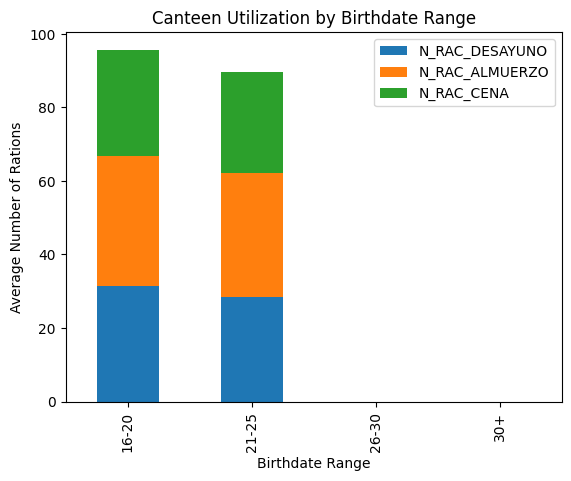

In [20]:
bins = [0, 20, 30, 40,50]
labels = ['16-20', '21-25', '26-30', '30+']
Students_benefit_canteen['BIRTHDATE_RANGE'] = pd.cut(Students_benefit_canteen['EDAD'], bins=bins, labels=labels,right=False)#
# Group by birthdate ranges and calculate canteen utilization statistics
birthdate_range_stats = Students_benefit_canteen.groupby('BIRTHDATE_RANGE')[['N_RAC_DESAYUNO', 'N_RAC_ALMUERZO', 'N_RAC_CENA']].mean()

# Group by faculty and calculate canteen utilization statistics
faculty_stats = Students_benefit_canteen.groupby('FACULTAD')[['N_RAC_DESAYUNO', 'N_RAC_ALMUERZO', 'N_RAC_CENA']].mean()

# Display the result
print("Canteen Utilization by Birthdate Range:")
print(birthdate_range_stats)

# Plot canteen utilization by birthdate range
plt.figure(figsize=(10, 6))
birthdate_range_stats.plot(kind='bar', stacked=True)
plt.title('Canteen Utilization by Birthdate Range')
plt.xlabel('Birthdate Range')
plt.ylabel('Average Number of Rations')

plt.show()



16-20 Age Range:
Students in the 16-20 age range exhibit a balanced utilization of the canteen services throughout the day, with a slightly higher preference for lunch. The average number of rations for breakfast, lunch, and dinner is 31.3, 35.4, and 29, respectively.

21-25 Age Range:
The 21-25 age group shows a similar trend, favoring lunch as the most frequented meal. The average number of rations for breakfast, lunch, and dinner is 28.44, 33.69, and 27.42, respectively.


This visualization highlights the importance of understanding age-specific preferences in canteen utilization. The data indicates that lunch is consistently the most popular meal across different age groups. However, the absence of data for older age ranges warrants further investigation to ensure a comprehensive understanding of dining patterns among all age demographics. This information can guide canteen management in tailoring offerings and services to meet the specific needs and preferences of students within different birthdate ranges.

<Figure size 1200x600 with 0 Axes>

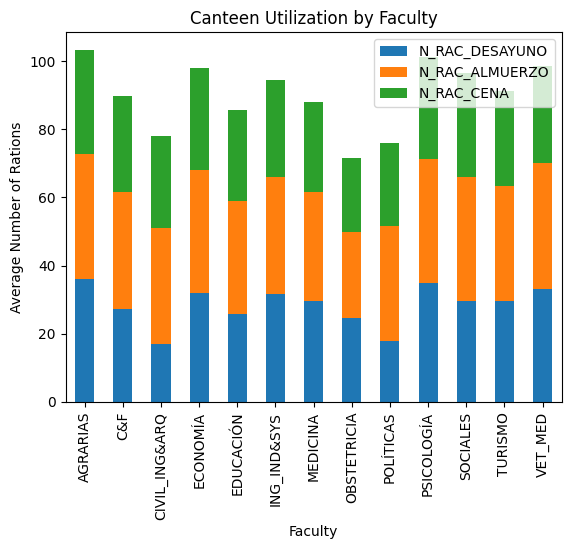

In [21]:
# Plot canteen utilization by faculty
plt.figure(figsize=(12, 6))
fa=faculty_stats.plot(kind='bar', stacked=True)
plt.title('Canteen Utilization by Faculty')
plt.xlabel('Faculty')
plt.ylabel('Average Number of Rations')
fa.legend(loc='upper right')
plt.show()

Agricultural Sciences (AGRARIAS):
Students in the Agricultural Sciences faculty consistently consume a substantial number of rations for each meal, with a relatively balanced distribution between breakfast, lunch, and dinner.

Accounting and Financial Sciences (C&F):
The Accounting and financial faculty (C&F) demonstrates a higher preference for lunch, with a notable number of rations consumed. Breakfast and dinner show moderate consumption levels.

Civil Engineering and Architecture (CIVIL_ING&ARQ):
Students in the Civil Engineering and Architecture faculty exhibit a balanced distribution of rations, with lunch being the most consumed meal.

Economics (ECONOMÍA):
The Economics faculty shows a balanced distribution of rations across all meals, with lunch having a slightly higher consumption rate.

Education Science (EDUCACIÓN):
The Education faculty has a balanced distribution of rations, with lunch being the most consumed meal.

Engineering and Systems (ING_IND&SYS):
Students in the Engineering and Systems faculty consistently consume a notable number of rations for all meals, with lunch being the most popular.

Medicine (MEDICINA):
The Medicine faculty demonstrates a preference for breakfast and lunch, with dinner having a lower consumption rate.

Obstetrics (OBSTETRICIA):
Obstetrics students have a moderate consumption of rations, with a slightly higher preference for breakfast.

Political Sciences (POLÍTICAS):
Political Sciences students show a preference for lunch, with breakfast and dinner having lower consumption rates.

Psychology (PSICOLOGÍA):
Psychology students have a high consumption of rations for breakfast and lunch, with dinner having a moderate consumption rate.

Social Sciences (SOCIALES):
Social Sciences students exhibit a balanced distribution of rations, with lunch being the most consumed meal.

Adminstration Sciences and Tourism (TURISMO):
Tourism students prefer lunch, with a notable number of rations consumed, while breakfast and dinner show moderate consumption levels.

Veterinary Medicine (VET_MED):
Veterinary Medicine students consistently consume a high number of rations for all meals, with lunch being the most popular.

This visualization provides valuable insights into the diverse dining preferences among different faculties, helping canteen management tailor services and offerings to meet the specific needs of each academic unit.

# CONCLUSION

'''In conclusion, the dataset offers valuable insights for canteen management to make data-driven decisions and create an inclusive and effective dining experience for students across the university.
'''

# REFERENCES

'''
Alumnos beneficiarios del comedor universitario de la Universidad Nacional Hermilio Valdizan – 2023 [UNHEVAL]


https://www.datosabiertos.gob.pe/dataset/alumnos-beneficiarios-del-comedor-universitario-de-la-universidad-nacional-hermilio-valdizan'''